# Create an Information System for a selected domain of interest.

You may use any back-end, including a DB developed in another module.
You may use any front-end, including CLI, GUI, web and API.
Describe the requirements of the information system, including users, data requirements, search, sorting, entry, update, validation, integrity, reporting etc.
Implement and test the Information System, and document your implementation thoroughly.
You must use public git (e.g. GitHub) to manage your source and versioning, with regular frequent commits.
You must attribute all code not written from scratch, either in accordance with its licence, if applicable, or if not, #taken from ...
You may use any programming language, however example programs will be presented in Python.
Groups must not exceed three members.
There will be a presentation in January, with the Moderator present, in order to assist in grading the work
Technical questions may be asked of any member of the group, and the assignment is individually marked. The contribution reports and GitHub record may be used to direct questions and to allocate marks.
All groups must submit a group report, containing individual contribution reports and a link to GitHub
All individuals must submit a reflective report on their experience of the group, assignment, and module

https://github.com/sabithamaram/PIS_B9IS123_CA2


Welcome to School Data Analysis Tracker!
Are you an existing user or a new user?
1) Existing user
2) New user
1

Username: line1
Password: ········

Login Successful



Pick a choice to process data in the way required:
1) Claculate the class average
2) Subject-wise marks
3) Student-wise marks
4) Plot graph of class growth
5) Enter student data
4
Pick the growth type:
1) Student Growth
2) Class Growth
1

Select the data directory from the pop up window to load the classroom data files from


The directory path you selected is:
/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data

The available files are:
 ['2_2014.csv', '2_2015.csv', '2_2016.csv', '.DS_Store', 'Source Folder', '1_2016.csv', '1_2014.csv', '1_2015.csv', 'Graphs']

Choose a grade
1

The raw data of Grade 1 is shown below:
YEAR 1
    Order              Name  Gender   RC  Listening  Writing  Math
0       1             Ahmed    Male  0.2        0.2      0.0  0.10
1       2              Ayan   


Enter name of student
mehak


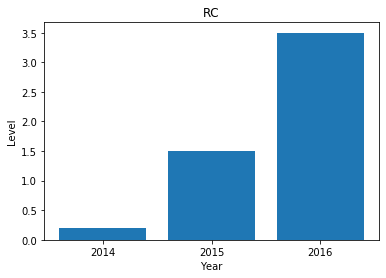

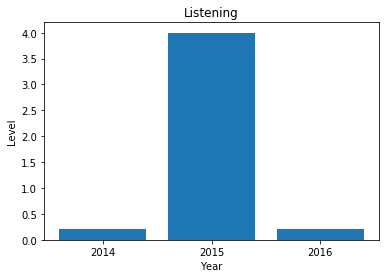

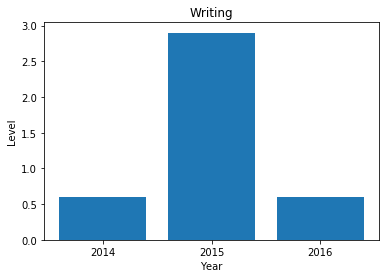

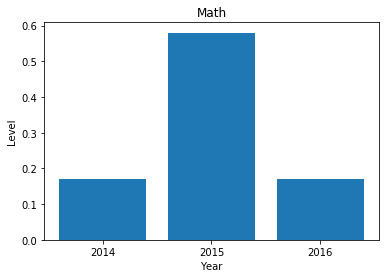

In [110]:
# Importing required libraries

import pandas as pd
from tabulate import tabulate as tb
import matplotlib.pyplot as plt
import numpy as np
import os
import tkinter
from tkinter import filedialog
from datetime import datetime
from getpass import getpass
from cryptography.fernet import Fernet

# Pandas to use DataFrames, reading and writing external files
# Tabulate to display data in a neat tabular form
# Matplotlib to plot graphs for student data analysis
# OS to list the files in a directory
# Tkinter to allow user to select a directory from where to load the external files
# Datatime used as part of naming convention when saving generated graph files


# Creating a class to read the external CSV data files
class LoadData:
    
    def __init__(self, choice):
        self.choice = choice

    # Creating a method to allow user to select the directory and location of file to open 
    def file_select(self):
        # Initializing the tkinter function
        root = tkinter.Tk()
        
        # Getting the directory location of the data files from the user. Initially providing a default location
        dir_name = filedialog.askdirectory(parent=root, initialdir="/Users/srikanthshileshpasam/OneDrive - Dublin Business School (DBS)/Python/CA2/Data/", title='Please select a directory')
        
        root.quit() # Reference link - https://stackoverflow.com/questions/28590669/tkinter-tkfiledialog-doesnt-exist/28590707
        
        print(f'\nThe directory path you selected is:\n{dir_name}')
        
        # Listing all the files in the directory selected by the user
        files_list = os.listdir(dir_name) # Reference link - https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
        
        print(f'\nThe available files are:\n {files_list}')
        
        # Choice 4 needs multiple files to be loaded. Hence checking for this first
        if self.choice == 4:
            grade_choice = int(input('\nChoose a grade\n'))
            
            if grade_choice == 1:
                # Loading the chosen grade data files from the directory path selected by the user
                first_data_file = pd.read_csv(dir_name + '/' + '1_2014.csv')
                sec_data_file = pd.read_csv(dir_name + '/' + '1_2015.csv')
                third_data_file = pd.read_csv(dir_name + '/' + '1_2016.csv')
                
                return (first_data_file, sec_data_file, third_data_file, dir_name, grade_choice)
            
            elif grade_choice == 2:
                first_data_file = pd.read_csv(dir_name + '/' + '2_2014.csv')
                sec_data_file = pd.read_csv(dir_name + '/' + '2_2015.csv')
                third_data_file = pd.read_csv(dir_name + '/' + '2_2016.csv')
                
                return (first_data_file, sec_data_file, third_data_file, dir_name, grade_choice)
            
            else:
                print('Grade data does not exist!')
                
        # If any other choice then only a single file needs to be opened
        else:
            # Getting the name of the file to be opened from the user
            file_name = input('\nSelect a file from above:\n')
            
            return (pd.read_csv(dir_name + '/' + file_name + '.csv'), dir_name, file_name)       
        

# Creating a class to allow for manual entry/edit of student details
class DataEntry:
    
    def __init__(self, dir_path, data_file_name, s_data, s_name, s_gender, roll_num, s_rc, s_lis, s_wri, s_math):
        self.dir_path = dir_path
        self.data_file_name = data_file_name
        self.s_data = s_data
        self.s_name = s_name
        self.s_gender = s_gender
        self.roll_num = roll_num
        self.s_rc = s_rc
        self.s_lis = s_lis
        self.s_wri = s_wri
        self.s_math = s_math
        
    # Creating a method to collect new student entry from user and saving to file
    def data_entry(self):
        # appending a new row to the existing DataFrame file. Using key-value pairs of dictionary to write the data to the appropriate columns
        self.s_data = self.s_data.append({'Order':self.roll_num, 'Name':self.s_name, 'Gender':self.s_gender, 'RC':self.s_rc, 'Listening':self.s_lis, 'Writing':self.s_wri, 'Math':self.s_math }, ignore_index=True)
        
        print(f'\nData entered successfully.\nSaving file..\n{self.s_data}')
        
        # Saving the data to the file in the directory loaction and file name given by the user previously when opening the file
        self.s_data.to_csv(self.dir_path + '/' + self.data_file_name + '.csv', index=False)
        
        print('\nSave Successful!')
    
    
    # Creating a method to collect and edit existing student data from user and saving to file    
    def data_edit(self):
        pass
            

        
# Creating a class to calculate subject-wise averages
class Avg:
    
    def __init__(self, avg_data):
        self.avg_data = avg_data
        
        
    # Creating separate methods for each subject because in real world the actual data format of each subject will be different and hence calculating avegaes for each of them will require different approaches    
    # Creating a method for collecting the RC data from the DataFrame
    def rc(self):
        rc_data = []
        
        # Creating a for loop to iterate over all values of 'RC' row and appending them to a list 'rc_data'
        for index, row in self.avg_data.iterrows(): # Reference link - https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
            reading_row_rc = row['RC']
            rc_data.append(reading_row_rc)
        
        # Claculating the RC average
        return sum(rc_data)/len(rc_data)
    
    
    # Creating a method for collecting the Listening data from the DataFrame
    def listening(self):
        lis_data = []
        
        # Creating a for loop to iterate over all values of 'Listening' row and appending them to a list 'lis_data'
        for index, row in self.avg_data.iterrows():
            reading_row_lis = row['Listening']
            lis_data.append(reading_row_lis)
            
        # Claculating the Listening average
        return sum(lis_data)/len(lis_data)
    
    
    # Creating a method for collecting the Writing data from the DataFrame
    def writing(self):
        wri_data = []
        
        # Creating a for loop to iterate over all values of 'Writing' row and appending them to a list 'wri_data'
        for index, row in self.avg_data.iterrows():
            reading_row_wri = row['Writing']
            wri_data.append(reading_row_wri)
        
        # Claculating the Writing average
        return sum(wri_data)/len(wri_data)
    
    
    # Creating a method for collecting the Math data from the DataFrame
    def math(self):
        math_data = []
        
        # Creating a for loop to iterate over all values of 'Math' row and appending them to a list 'math_data'
        for index, row in self.avg_data.iterrows():
            reading_row_math = row['Math']
            math_data.append(reading_row_math)
        
        # Claculating the Math average
        return (sum(math_data)/len(math_data)) * 100
    
    
    
# Creating a class to tabulate subject-wise marks of a class during a particular year
class SubjectMarks:
    
    def __init__(self, sub_data):
        self.sub_data = sub_data
        
    
    # Creating a method to collect 'RC' data of all students from the DataFrame    
    def rc(self):
        # Selecting the columns from the DataFrame
        data_df = self.sub_data[['Order', 'Name', 'RC']]
        
        # Returning tabulated data with the column headings
        return tb(data_df, headers=["Roll Order", "Name", "RC"], tablefmt='grid', showindex='never') #Reference link - https://pypi.org/project/tabulate/

    
    # Creating a method to collect 'Listening' data of all students from the DataFrame    
    def listening(self):
        # Selecting the columns from the DataFrame
        data_df = self.sub_data[['Order', 'Name', 'Listening']]
        
        # Returning tabulated data with the column headings
        return tb(data_df, headers=["Roll Order", "Name", "Listening"], tablefmt='grid', showindex='never')
   

    # Creating a method to collect 'Writing' data of all students from the DataFrame    
    def writing(self):
        # Selecting the columns from the DataFrame
        data_df = self.sub_data[['Order', 'Name', 'Writing']]
        
        # Returning tabulated data with the column headings
        return tb(data_df, headers=["Roll Order", "Name", "Writing"], tablefmt='grid', showindex='never')
   

    # Creating a method to collect 'Math' data of all students from the DataFrame    
    def math(self):
        # Selecting the columns from the DataFrame
        data_df = self.sub_data[['Order', 'Name', 'Math']]
        
        # Returning tabulated data with the column headings
        return tb(data_df, headers=["Roll Order", "Name", "Math"], tablefmt='grid', showindex='never')
    
    

# Creating a class to tabulate student marks individually
class StudentMarks:
    
    def __init__(self, stu_data, stu_name):
        self.stu_data = stu_data
        self.stu_name = stu_name
    
    
    # Creating a method to search for a student name in the DataFrame and tabulate his/her details    
    def marks(self, class_call=None):
        self.class_call = class_call
        
        # Selecting the columns to be displayed
        data_df = pd.DataFrame(self.stu_data, columns = ['Order', 'Name', 'RC', 'Listening', 'Writing', 'Math'])
        
        # Searching for the entire or part of student name in the 'Name' column of the DataFrame using the name entered by the user
        data_df = data_df[data_df['Name'].str.contains(self.stu_name)] # Reference link - https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

        if data_df.empty == True: # Reference link - https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.empty.html
            return 'No student found!'
        
        # Checking to see if data is requested from another class or for tabulating and displaying the DataFrame
        elif class_call == None:
            return tb(data_df, headers=["Roll Order", "Name", "RC", "Listening", "Writing", "Math"], tablefmt='grid', showindex='never')
        
        # If data requested from another class then DataFrame is sent directly without tabulating it
        else:
            return data_df



# Creating a class to display the data in the form of graphs
class GraphPlot:
    
    def __init__(self, graph_data_1, graph_data_2, graph_data_3, dir_loc, graph_grade):
        self.graph_data_1 = graph_data_1
        self.graph_data_2 = graph_data_2
        self.graph_data_3 = graph_data_3
        self.dir_loc = dir_loc
        self.graph_grade = graph_grade
   

    # Creating a method to collect the average RC values of a class over all the years
    def class_plot_rc(self):
        # Calling the 'Avg' class within this class and sending data to process
        class_call = Avg(self.graph_data_1)
        
        # Calling a method of a different class within this class to calculate the average levels of sent data
        rc_1 = class_call.rc()
        
        class_call = Avg(self.graph_data_2)
        rc_2 = class_call.rc()
        
        class_call = Avg(self.graph_data_3)
        rc_3 = class_call.rc()
        
        # Sending the calculated average levels to a different method within this class to plot the graph
        self.plot_graph(rc_1, rc_2, rc_3, 'RC', self.dir_loc, self.graph_grade)
    
    
    # Creating a method to collect the average Listening values of a class over all the years       
    def class_plot_lis(self):
        class_call = Avg(self.graph_data_1)
        lis_1 = class_call.listening()
        
        class_call = Avg(self.graph_data_2)
        lis_2 = class_call.listening()
        
        class_call = Avg(self.graph_data_3)
        lis_3 = class_call.listening()
        
        self.plot_graph(lis_1, lis_2, lis_3, 'Listening', self.dir_loc, self.graph_grade)
    
    
    # Creating a method to collect the average Writing values of a class over all the years    
    def class_plot_writing(self):
        class_call = Avg(self.graph_data_1)
        wri_1 = class_call.writing()
        
        class_call = Avg(self.graph_data_2)
        wri_2 = class_call.writing()
        
        class_call = Avg(self.graph_data_3)
        wri_3 = class_call.writing()
        
        self.plot_graph(wri_1, wri_2, wri_3, 'Writing', self.dir_loc, self.graph_grade)
    
    
    # Creating a method to collect the average Math values of a class over all the years
    def class_plot_math(self):
        class_call = Avg(self.graph_data_1)
        math_1 = class_call.math()
        
        class_call = Avg(self.graph_data_2)
        math_2 = class_call.math()
        
        class_call = Avg(self.graph_data_3)
        math_3 = class_call.math()
        
        self.plot_graph(math_1, math_2, math_3, 'Math', self.dir_loc, self.graph_grade)

        
    # Creating a method to collect individual students levels over the years    
    def stu_plot(self, student_name):
        self.student_name = student_name
        
        # Collecting year_1 marks of a student
        year_1 = StudentMarks(self.graph_data_1, student_name)
        
        # Collecting all subject marks for a student 
        marks_1 = year_1.marks(True)
        
        # Checking to see if student data exists for user entry before proceeding further
        # If data exists, the 'StudentMarks' class will return a DataFrame which when checked by 'isinstance' will result in true
        # If data does not exist then the 'StudentMarks' class will return a string and the if condition will result in false thus not executing further
        if isinstance(marks_1, pd.DataFrame):
            
            # Looping through the individual student data to collect subject data individually
            for index, row in marks_1.iterrows():
                rc_1 = row['RC']
                lis_1 = row['Listening']
                wri_1 = row['Writing']
                math_1 = row['Math']
        
            year_2 = StudentMarks(self.graph_data_2, student_name)
            marks_2 = year_2.marks(True)
            
            for index, row in marks_2.iterrows():
                rc_2 = row['RC']
                lis_2 = row['Listening']
                wri_2 = row['Writing']
                math_2 = row['Math']

            year_3 = StudentMarks(self.graph_data_3, student_name)
            marks_3 = year_3.marks(True)
            
            for index, row in marks_3.iterrows():
                rc_3 = row['RC']
                lis_3 = row['Listening']
                wri_3 = row['Writing']
                math_3 = row['Math']
            
            # Sending the individual student subject-wise data to another method within the class to plot the graph
            self.plot_graph(rc_1, rc_2, rc_3, 'RC', self.dir_loc, self.graph_grade, student_name)
            self.plot_graph(lis_1, lis_2, lis_3, 'Listening', self.dir_loc, self.graph_grade, student_name)
            self.plot_graph(wri_1, wri_2, wri_3, 'Writing', self.dir_loc, self.graph_grade, student_name)
            self.plot_graph(math_1, math_2, math_3, 'Math', self.dir_loc, self.graph_grade, student_name)
            
        else:
            print('No student data found!')
    
    
    # Creating a method to plot graphs
    def plot_graph(self, data_1, data_2, data_3, sub, loc, grade_num, stud_name=None):
        self.data_1 = data_1
        self.data_2 = data_2
        self.data_3 = data_3
        self.sub = sub
        self.loc = loc
        self.grade_num = grade_num
        self.stud_name = stud_name
        
        x = [2014, 2015, 2016]
        y = [data_1, data_2, data_3]
        
        # Creating bar graph
        plt.bar(x, y)
        plt.xlabel('Year')
        plt.ylabel('Level')
        plt.title(sub) # Reference link - https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

        # Setting the x-axis lable frequency
        plt.xticks(np.arange(min(x), max(x)+1, 1.0)) # Reference link - https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
        
        # Saving the generated graphs to the location selected by the user with a certain naming convention
        if stud_name == None:
            plt.savefig(loc + '/Graphs/' + 'Grade_' + str(grade_num) + '_' + sub + datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '.png') # Reference link - https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python
        
        else:
            plt.savefig(loc + '/Graphs/' + stud_name + '_Grade_' + str(grade_num) + '_' + sub + datetime.now().strftime('%Y-%m-%d %H:%M:%S') + '.png')
        
        return plt.show()
        


# Creating a class to authenticate user access
class Auth:
    
    def __init__(self, user=None, pwd=None, fer_key=None):
        self.user = user
        self.pwd = pwd
        self.fer_key = fer_key
    
    
    # Creating a method to validate existing user credentials
    def credentials(self):
        with open("User_Details.txt", "rb") as file:
            data = file.readlines()
            file.close()
            
            x = False
            y = 0
            while x == False and y < len(data):
                if (self.fer_key.decrypt(self.user) == self.fer_key.decrypt(data[y])) and (self.fer_key.decrypt(self.pwd) == self.fer_key.decrypt(data[y+1])):
                    x = True
                    return True
                else:
                    y += 2
            
            if x == False:
                return False
            
        
    # Creating a method to allow for new user registrations    
    def new_user(self):
        file = open("User_Details.txt", "ab")
        
        file.write(self.user)
        line = str(0) + "\n"
        file.write(line.encode('utf-8'))
        
        file.write(self.pwd)
        line = str(0) + "\n"
        file.write(line.encode('utf-8'))
        
        file.close()
                
        return 'User created successfully!'
    


# Creating a class to generate and read encryption keys
class Keys:
    
    # Creating a method for generating new encryption key
    def key_gen():
        key = Fernet.generate_key()
        
        file = open("Fernet_Key.txt", "wb")
        file.write(key)
        file.close()
        
        print('New key generated successfully!')
        
    
    # Creating a method for accessing the encryption key in order to decrypt the login credentials
    def read_key():
        with open('Fernet_Key.txt', 'rb') as file:
            data = file.read()
            file.close()

        return data

    


# Keys.key_gen()




login = int(input('\nWelcome to School Data Analysis Tracker!\nAre you an existing user or a new user?\n1) Existing user\n2) New user\n'))

if login == 1:
    user_id = input('\nUsername: ')
    user_id = user_id.encode()
    pwd = getpass('Password: ')
    pwd = pwd.encode() # Reference link - https://stackoverflow.com/questions/9202224/getting-command-line-password-input-in-python
    
    key_code = Keys
    code = key_code.read_key()
    
    key = Fernet(code)
    
    encrypted_pwd = key.encrypt(pwd)
    encrypted_id = key.encrypt(user_id)
    
    user_auth = Auth(encrypted_id, encrypted_pwd, key)
    
    login_status = user_auth.credentials()

        

    if login_status == True:
        print('\nLogin Successful\n')

        # User choice for data processing
        choice = int(input('\n\nPick a choice to process data in the way required:\n1) Claculate the class average\n2) Subject-wise marks\n3) Student-wise marks\n4) Plot graph of class growth\n5) Enter student data\n'))

        load_data = LoadData(choice)

        # If user wants to see the growth in the form of graphs
        if choice == 4:
            comp_choice = input('Pick the growth type:\n1) Student Growth\n2) Class Growth\n')

            print('\nSelect the data directory from the pop up window to load the classroom data files from\n')

            # Collecting all the CSV files as a DataFrame for a user chosen grade level
            first_file, sec_file, third_file, d_loc, grade = load_data.file_select()

            print(f'\nThe raw data of Grade {grade} is shown below:\nYEAR 1\n{first_file}\nYEAR 2\n{sec_file}\nYEAR 3\n{third_file}')

            # Sending all the DataFrame files to the GraphPlot class to plot graph
            graph_plot = GraphPlot(first_file, sec_file, third_file, d_loc, grade)

            # For individual student growth over the years
            if comp_choice == '1':
                student = input('\nEnter name of student\n')
                stu_growth = graph_plot.stu_plot(student.title())

            # For overall class growth over the years
            elif comp_choice == '2':
                class_growth_rc = graph_plot.class_plot_rc()
                class_growth_lis = graph_plot.class_plot_lis()
                class_growth_writing = graph_plot.class_plot_writing()
                class_growth_math = graph_plot.class_plot_math()


        elif choice == 1 or choice == 2 or choice == 3 or choice == 5:
            print('\nSelect a directory from the pop up window to begin\n')

            master_data_file, d_loc, f_name = load_data.file_select()

            print(f'\nOpening file...\n{master_data_file}')

            # If user wants overall class avarages subject-wise for a particular year
            if choice == 1:
                class_average = Avg(master_data_file)

                class_average_rc = class_average.rc()
                class_average_lis = class_average.listening()
                class_average_writing = class_average.writing()
                class_average_math = class_average.math()

                print('\n\n\nThe class average is as below:\n\nRC: %.2f' %class_average_rc)
                print('\nListening: %.2f' %class_average_lis)
                print('\nWriting: %.2f' %class_average_writing)
                print('\nMath: %.2f' %class_average_math)

            # If user wants subject-wise marks of a class for a particular year
            elif choice == 2:
                subject_wise_marks = SubjectMarks(master_data_file)

                class_rc = subject_wise_marks.rc()
                class_lis = subject_wise_marks.listening()
                class_writing = subject_wise_marks.writing()
                class_math = subject_wise_marks.math()

                print(f'\n\n\nThe class RC marks are:\n{class_rc}')
                print(f'\n\n\nThe class Listening marks are:\n{class_lis}')
                print(f'\n\n\nThe class Writing marks are:\n{class_writing}')
                print(f'\n\n\nThe class Math marks are:\n{class_math}')

            # If user wants individual student marks
            elif choice == 3:
                student = input('\nEnter name of student\n')

                student_wise_marks = StudentMarks(master_data_file, student.title())

                student_marks = student_wise_marks.marks()

                print(f'\nMarks for {student} are as follows:\n{student_marks}')

            # If user wants to add/edit student data
            elif choice == 5: 
                entry_choice = int(input('\n1)New student entry\n2)Edit existing student data\n'))

                if entry_choice == 1:
                    more_entries = True

                    # Using while loop to check if user wants to enter multiple student details
                    while more_entries == True:
                        student = input('\nEnter name of student\n')
                        roll_entry = int(input(f'\nEnter Roll number of {student.title()}:\n'))
                        gender = input('\nEnter gender:\n')
                        rc_entry = float(input('\nEnter RC level:\n'))
                        lis_entry = float(input('\nEnter Listening level:\n'))
                        wri_entry = float(input('\nEnter Writing level:\n'))
                        math_entry = float(input('\nEnter Math level:\n'))

                        enter_data = DataEntry(d_loc, f_name, master_data_file, student.title(), gender.capitalize(), roll_entry, rc_entry, lis_entry, wri_entry, math_entry)

                        appending_data = enter_data.data_entry()

                        entries = input('\nWould you like to add another entry?\n1) Yes\n2) No\n')

                        if entries == '1' or entries.upper() == 'Y' or entries.upper() == 'YES':
                            more_entries = True

                        else:
                            more_entries = False
                            print('\nExiting...')

                elif entry_choice == 2:
                    student = input('\nEnter full name of a student to begin editing\n')
                    student_edit = StudentMarks(master_data_file, student.title())
                    student_data = student_edit.marks(True)

                    print(f'\nMarks for {student} on file are as follows:\n{student_data}')

        else:
            print('Invalid choice!')
        
    else:
        print('\nLogin failed!')
        
        
elif login == 2:
    user_id = input('\nCreate a user name: ')
    user_id = user_id.encode()
    pwd = getpass('Create your password: ')
    pwd = pwd.encode() # Reference link - https://stackoverflow.com/questions/9202224/getting-command-line-password-input-in-python
    
    key_code = Keys
    code = key_code.read_key()
    
    key = Fernet(code)
    
    encrypted_pwd = key.encrypt(pwd)
    encrypted_id = key.encrypt(user_id)
    
    user_auth = Auth(encrypted_id, encrypted_pwd)
    
    login_status = user_auth.new_user()
    
    print(f'\n{login_status}')

else:
    print('Invalid choice!')